# IBM HR Analysis

    ◆ Education 
    1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

    ◆ EnvironmentSatisfaction 
    1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    ◆ JobInvolvement 
    1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    ◆ JobSatisfaction 
    1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    ◆ PerformanceRating 
    1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

    ◆ RelationshipSatisfaction 
    1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    ◆ WorkLifeBalance 
    1 'Bad' 2 'Good' 3 'Better' 4 'Best'
    
    ◆ Attrition : 명예퇴직?
    
    ◆ DistanceFromHome
    1 Far ~ 8 Close 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
import scipy.stats as stats

In [31]:
hr = pd.read_csv("ibm_hr.csv")

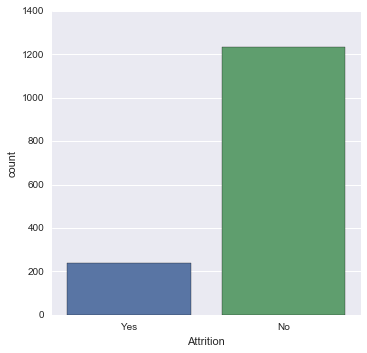

In [32]:
sns.factorplot('Attrition',kind='count',data=hr, size=5) # 명예퇴직자 200명 

In [33]:
hr.head(2)

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [49]:
hr= hr.rename(columns={'\ufeffAge':'Age'})

In [50]:
hr.columns[0]

'Age'

In [54]:
hr.to_csv("ibm_hr.csv",index=False)

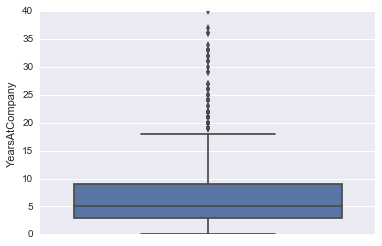

In [51]:
sns.boxplot(y='YearsAtCompany',data=hr)

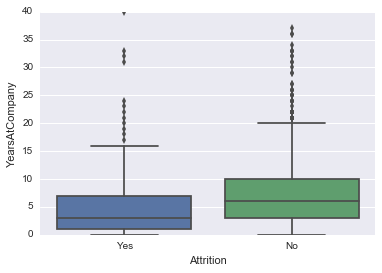

In [52]:
sns.boxplot(y='YearsAtCompany',x='Attrition',data=hr)

### 통계적으로 차이가 있는지 확인
 - 유의미한 평균차이가 있다. 

In [16]:
stats.ttest_ind(hr[hr['Attrition']=='Yes']['Age'], hr[hr['Attrition']=='No']['Age']) # 같지 않다 유의미한 차이가 있다. 

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.3563080211036489e-10)

### Business Travel 

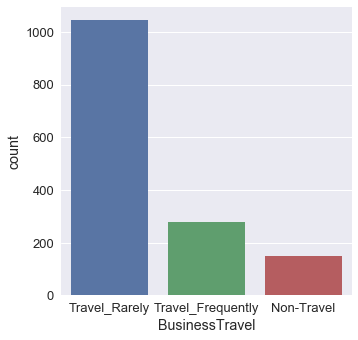

In [24]:
sns.set(font_scale=1.3)
sns.factorplot('BusinessTravel', kind='count',data=hr,size=5)

In [27]:
BT_df = pd.DataFrame({'cnt':hr.groupby(['Attrition','BusinessTravel']).size()}).reset_index()
BT_df.head()

,Attrition,BusinessTravel,cnt
0,No,Non-Travel,138
1,No,Travel_Frequently,208
2,No,Travel_Rarely,887
3,Yes,Non-Travel,12
4,Yes,Travel_Frequently,69


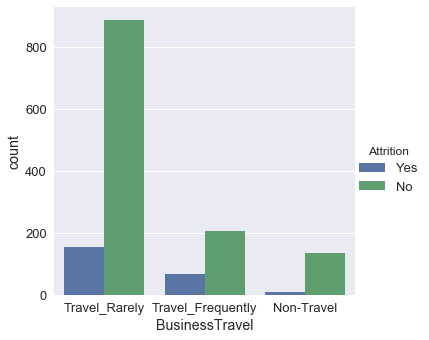

In [29]:
sns.set(font_scale=1.3)
sns.factorplot('BusinessTravel', kind='count',data=hr,size=5, hue='Attrition')